(20%) Describe: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter [6] notebook that uses descriptive statistics and plots to describe the Boston House Prices [1] dataset. 

*Good summary of the dataset, repository well laid-out and organised. Reasonable commits to the repository.*

(20%) Infer: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook.

*Appropriate analysis of the relationship between the me- dian house price and whether the house borders the river, with good explanations of the analysis.*

(60%) Predict: Again using the same notebook, use keras [7] to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

*Well-trained neural network providing decent predictions of house prices based on the other variables. Good explanations of how to use the neural network and how it works.*

- Project plan in readme / github issues
- Explanation of project in readme


[1] Boston Standard Metropolitan Statistical Area. Boston house prices dataset. https://www.kaggle.com/c/boston-housing.

[2] SciPy developers. The scipy python package. https://www.scipy.org/.

[3] Python Software Foundation. Welcome to python.org. https://www.python.org/.

[4] GMIT. Quality assurance framework. https://www.gmit.ie/general/quality-assurance-framework.

[5] GitHub Guides. Mastering markdown. https://guides.github.com/features/mastering-markdown/.

[6] Project Jupyter. Project jupyter. https://jupyter.org/.

[7] Keras Team. Keras: The python deep learning library. https://keras.io/.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston

In [7]:
boston_dataset = load_boston()

In [14]:
#print(boston_dataset)
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [8]:
print(type(boston_dataset))

<class 'sklearn.utils.Bunch'>


CRIM: Per capita crime rate by town  
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft  
INDUS: Proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: Nitric oxide concentration (parts per 10 million)  
RM: Average number of rooms per dwelling  
AGE: Proportion of owner-occupied units built prior to 1940  
DIS: Weighted distances to five Boston employment centers  
RAD: Index of accessibility to radial highways  
TAX: Full-value property tax rate per $10,000  
PTRATIO: Pupil-teacher ratio by town   

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town  
LSTAT: Percentage of lower status of the population    
MEDV: Median value of owner-occupied homes in $1000s   


Target variable = MEDV (median house prices)  
Feature variables = other variables used for prediction of house price.

In [16]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/Users/joanhealy1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


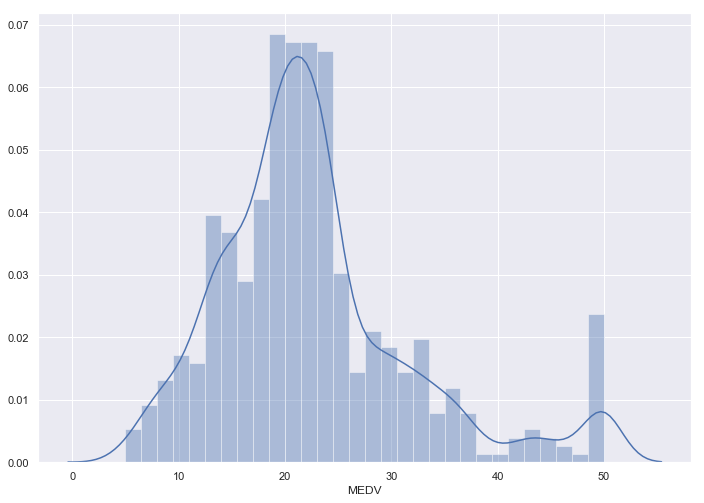

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()
# MEDV are distributed normally with few outliers.

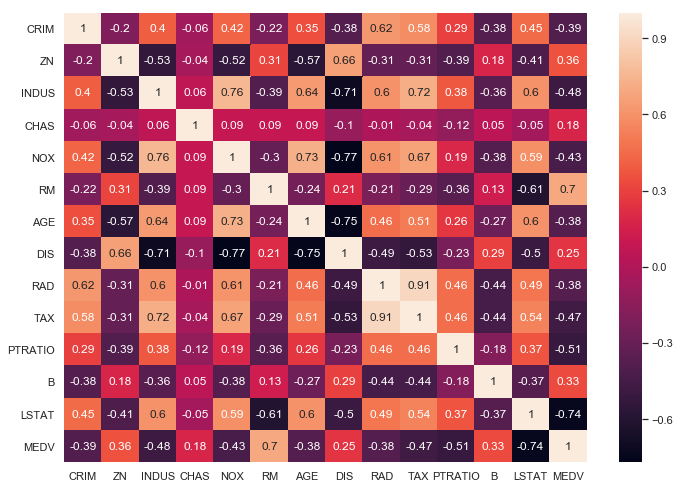

In [20]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

1 = strong positive correlation between 2 variables  
-1 = strong negative correlation between 2 variables

RM has a strong positive correlation with MEDV (0.7)   
An important point in selecting features for a linear regression model is to check for multi-co-linearity

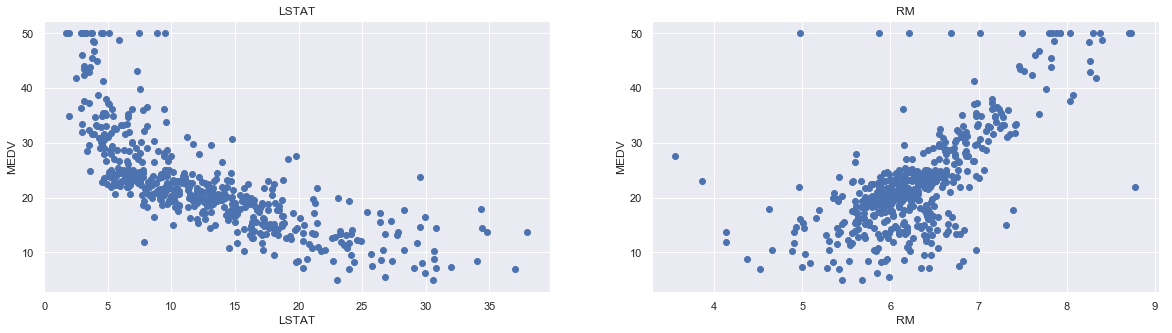

In [21]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [34]:
# Calculate the best values for m and c.
w = boston['RM']
d = boston['MEDV']
# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 9.102109 and c is -34.670621.


In [29]:
np.polyfit(boston['RM'], boston['MEDV'], 1)

array([  9.10210898, -34.67062078])

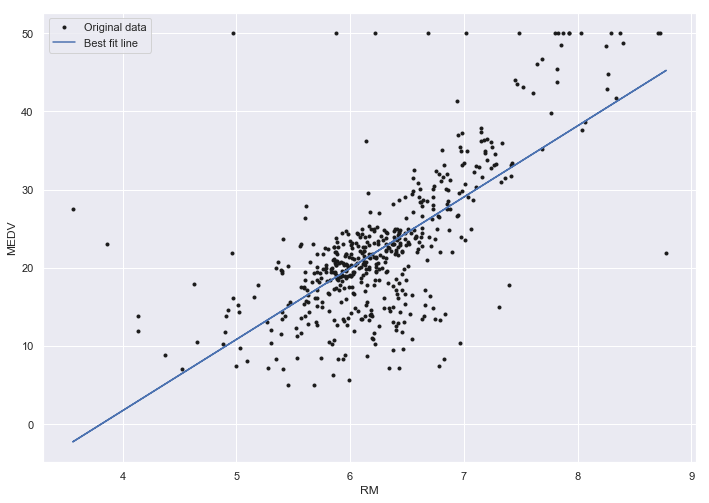

In [30]:
# Create the plot.
# plt.plot(w, d, 'k.', label='Original data')
plt.plot(boston['RM'], boston['MEDV'], 'k.', label='Original data')
plt.plot(boston['RM'], 9.10210898 * boston['RM'] + -34.67062078, 'b-', label='Best fit line')

# Set some properties for the plot.
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()

# Show the plot.
plt.show()

In [22]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

References:  
https://kite.com/python/docs/sklearn.utils.Bunch  
https://stackoverflow.com/questions/48769682/how-do-i-convert-data-from-a-scikit-learn-bunch-object-to-a-pandas-dataframe/48769980  
https://www.kaggle.com/c/boston-housing/data  
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  

